In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series , DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score

In [2]:
titanic = pd.read_csv(r"C:\Users\SHOHONI\Desktop\Tution Related\REGRESSION\titanic-training-data.csv")
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic1 = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace = True)

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

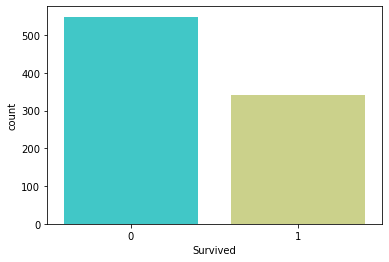

In [7]:
sns.countplot(x='Survived',data=titanic , palette = 'rainbow')
#data imbalancing

In [10]:
titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


<AxesSubplot:xlabel='Parch', ylabel='Age'>

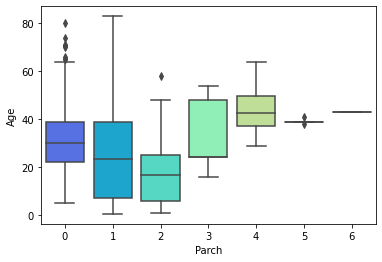

In [11]:
sns.boxplot(x='Parch',y='Age',data=titanic , palette= 'rainbow')

In [12]:
parch = titanic.groupby(titanic['Parch'])
parch.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,25.169000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [13]:
def age1(col):
    Age=col[0]
    Parch=col[1]
    if pd.isnull(Age):
        if parch == 0:
            return 32
        elif  parch == 1: 
            return 24
        elif  parch == 2: 
            return 17
        elif  parch == 3: 
            return 33
        elif  parch == 4:
            return 44
        elif parch == 5:
            return 39
        else:
            return 43
    else:
        return Age     

In [14]:
titanic['Age'] = titanic[['Age','Parch']].apply(age1, axis=1)

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
titanic.dropna(inplace=True)

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender =  titanic['Sex']
gender1= le.fit_transform(gender)

In [20]:
gender1

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [21]:
genderdf =  pd.DataFrame(gender1 , columns = ['gender'])
genderdf

,gender
0,1
1,0
2,0
3,0
4,1
...,...
884,1
885,0
886,0
887,1


In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
embarked = titanic['Embarked']
embarked1 = le.fit_transform(embarked)
from sklearn.preprocessing import OneHotEncoder 
binary = OneHotEncoder(categories='auto')
cols = binary.fit_transform(embarked1.reshape(-1,1))
matrix = cols.toarray()
emb_df = pd.DataFrame(matrix , columns = ['C','Q','S'])

In [24]:
matrix

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [25]:
embarked1

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

In [26]:
emb_df

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [27]:
titanicnewdata = pd.concat([titanic , genderdf , emb_df] , axis =1 )
titanicnewdata.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,gender,C,Q,S
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,1.0,0.0,0.0,1.0


In [28]:
titanicnewdata.drop(['Sex' , 'Embarked','S'], axis=1 , inplace = True)

In [29]:
titanicnewdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender,C,Q
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0


In [30]:
titanicnewdata.isnull().sum()

PassengerId    2
Survived       2
Pclass         2
Age            2
SibSp          2
Parch          2
Fare           2
gender         2
C              2
Q              2
dtype: int64

In [31]:
titanicnewdata.dropna(inplace=True)

In [32]:
titanicnewdata.to_csv("titanic data new.csv")

In [33]:
titanicnewdata.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender,C,Q
PassengerId,1.000000,-0.005995,-0.034053,0.031180,-0.056035,0.000195,0.013791,0.043247,-0.001208,-0.033715
Survived,-0.005995,1.000000,-0.333582,-0.094226,-0.033832,0.083536,0.255273,-0.023116,0.010614,0.037671
Pclass,-0.034053,-0.333582,1.000000,-0.240828,0.081421,0.016458,-0.548862,0.032381,-0.080982,0.033399
Age,0.031180,-0.094226,-0.240828,1.000000,-0.204015,-0.206434,0.042144,0.007722,0.040359,0.038518
SibSp,-0.056035,-0.033832,0.081421,-0.204015,1.000000,0.414244,0.160664,0.027617,0.007137,-0.074180
Parch,0.000195,0.083536,0.016458,-0.206434,0.414244,1.000000,0.217332,0.045622,-0.001415,-0.072021
Fare,0.013791,0.255273,-0.548862,0.042144,0.160664,0.217332,1.000000,-0.024440,0.053277,-0.021442
gender,0.043247,-0.023116,0.032381,0.007722,0.027617,0.045622,-0.024440,1.000000,-0.083793,-0.074760
C,-0.001208,0.010614,-0.080982,0.040359,0.007137,-0.001415,0.053277,-0.083793,1.000000,-0.149037
Q,-0.033715,0.037671,0.033399,0.038518,-0.074180,-0.072021,-0.021442,-0.074760,-0.149037,1.000000


<AxesSubplot:>

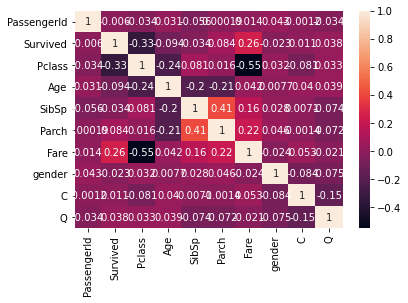

In [34]:
sns.heatmap(titanicnewdata.corr(),annot = True)

In [35]:
titanicnewdata.drop(['Fare','Pclass'], axis=1, inplace= True)

In [36]:
titanicnewdata.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
gender         0
C              0
Q              0
dtype: int64

In [37]:
titanicnewdata.dropna(inplace=True)

In [38]:
titanicnewdata.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
gender         0
C              0
Q              0
dtype: int64

In [ ]:
x = titanicnewdata.drop('Survived', axis =1)
y = titanicnewdata['Survived']

In [45]:
x_train , x_test , y_train , y_test = train_test_split(titanicnewdata.drop('Survived', axis =1),
                                                        titanicnewdata['Survived'], test_size=.2,
                                                       random_state=91)

In [46]:
print(x_train.shape)
print(y_train.shape)

(709, 7)
(709,)


In [47]:
print(x_test.shape)
print(y_test.shape)

(178, 7)
(178,)


In [48]:
y_test

811    0.0
392    0.0
691    1.0
880    1.0
402    0.0
      ... 
704    0.0
714    0.0
99     0.0
504    1.0
560    0.0
Name: Survived, Length: 178, dtype: float64

In [49]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver = 'liblinear')
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)

In [50]:
confusion_matrix = pd.crosstab(y_test,y_pred, 
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix
#false negative - least desirable

Predicted,0.0,1.0
Actual,,
0.0,116,2
1.0,55,5


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

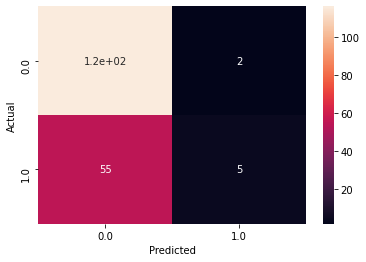

In [51]:
sns.heatmap(confusion_matrix, annot = True)

In [52]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[116,   2],
       [ 55,   5]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.98      0.80       118
         1.0       0.71      0.08      0.15        60

    accuracy                           0.68       178
   macro avg       0.70      0.53      0.48       178
weighted avg       0.69      0.68      0.58       178



In [57]:
titanicnewdata[884:885]

,PassengerId,Survived,Age,SibSp,Parch,gender,C,Q
886,887.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0


In [68]:
test = np.array([880,62,0,0,1,0,0]).reshape(1,-1)

In [69]:
lr.predict_proba(test)

array([[0.70562049, 0.29437951]])

In [70]:
lr.predict(test)

array([0.])

In [48]:
test = np.array([232,28,0,0,1,0,0,1]).reshape(1,-1)

In [49]:
lr.predict(test)

array([0.])

In [50]:
print(lr.predict_proba(test))

[[0.59104475 0.40895525]]


In [69]:
test = np.array([766,51,1,0,1,1,0,0]).reshape(1,-1)

In [70]:
print(lr.predict(test))

[0.]


In [71]:
print(lr.predict_proba(test))

[[0.71414765 0.28585235]]


<AxesSubplot:xlabel='Survived', ylabel='count'>

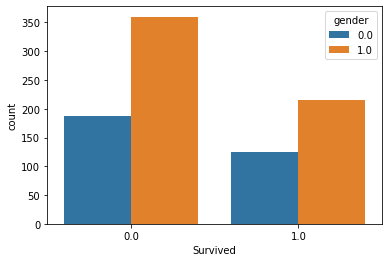

In [78]:
sns.countplot(x = 'Survived', hue = 'gender', data = titanicnewdata)